In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
#reading csv files
df1 = pd.read_csv('CRMLSSold202501_filled.csv')
df2 = pd.read_csv('CRMLSSold202502_filled.csv')
df3 = pd.read_csv('CRMLSSold202503_filled.csv')
df4 = pd.read_csv('CRMLSSold202504_filled.csv')
df5 = pd.read_csv('CRMLSSold202505_filled.csv')
df6 = pd.read_csv('CRMLSSold202506_filled.csv')
df7 = pd.read_csv('CRMLSSold202507_filled.csv')
df8 = pd.read_csv('CRMLSSold202508_filled-2.csv')
df9 = pd.read_csv('CRMLSSold202509.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

/var/folders/v9/47dbywsd3kq7y4_mgpqb1kqm0000gn/T/ipykernel_49446/3956917695.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('CRMLSSold202506_filled.csv')


In [4]:
#filtering for residential single family homes
df = df[
    (df["PropertyType"] == "Residential") &
    (df["PropertySubType"] == "SingleFamilyResidence")
]

print(df.shape)

(97987, 80)


In [5]:
df.columns

Index(['BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN',
       'BasementYN', 'PoolPrivateYN', 'OriginalListPrice', 'ListingKey',
       'ListAgentEmail', 'CloseDate', 'ClosePrice', 'ListAgentFirstName',
       'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName',
       'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
       'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'BuyerOfficeAOR', 'YearBuilt', 'StreetNumberNumeric',
       'ListingId', 'BathroomsTotalInteger', 'City', '

In [6]:
#columns to drop
drop_cols = [
    "ListPrice","OriginalListPrice","DaysOnMarket","ListingContractDate",
    "ContractStatusChangeDate","PurchaseContractDate",
    "ListAgentAOR","ListAgentEmail","ListAgentFirstName","ListAgentLastName",
    "ListAgentFullName","CoListAgentFirstName","CoListAgentLastName",
    "BuyerAgentAOR","BuyerAgentMlsId","BuyerAgentFirstName","BuyerAgentLastName",
    "CoBuyerAgentFirstName","BuyerOfficeAOR","ListOfficeName","BuyerOfficeName",
    "CoListOfficeName","MlsStatus","ListingKey","ListingId","ListingKeyNumeric",
    "AssociationFeeFrequency", "MLSAreaMajor", "BusinessType","latfilled","lonfilled"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

**Evaluating Missing values**

In [7]:
#checking for missing values by column
missing_percentage = df.isnull().mean().sort_values(ascending=False)
missing_percentage

MiddleOrJuniorSchoolDistrict    1.000000
CoveredSpaces                   1.000000
TaxYear                         1.000000
TaxAnnualAmount                 1.000000
AboveGradeFinishedArea          1.000000
FireplacesTotal                 1.000000
ElementarySchoolDistrict        1.000000
WaterfrontYN                    0.999500
BelowGradeFinishedArea          0.993224
BasementYN                      0.975936
BuilderName                     0.953167
LotSizeDimensions               0.937135
BuildingAreaTotal               0.933644
ElementarySchool                0.866135
MiddleOrJuniorSchool            0.864962
HighSchool                      0.824650
SubdivisionName                 0.647964
MainLevelBedrooms               0.394287
Flooring                        0.354363
AssociationFee                  0.294427
HighSchoolDistrict              0.268566
AttachedGarageYN                0.119546
Stories                         0.110780
ViewYN                          0.090308
PoolPrivateYN   

In [8]:
cols_to_drop = missing_percentage[missing_percentage > 0.6].index.tolist()
cols_to_drop

['MiddleOrJuniorSchoolDistrict',
 'CoveredSpaces',
 'TaxYear',
 'TaxAnnualAmount',
 'AboveGradeFinishedArea',
 'FireplacesTotal',
 'ElementarySchoolDistrict',
 'WaterfrontYN',
 'BelowGradeFinishedArea',
 'BasementYN',
 'BuilderName',
 'LotSizeDimensions',
 'BuildingAreaTotal',
 'ElementarySchool',
 'MiddleOrJuniorSchool',
 'HighSchool',
 'SubdivisionName']

In [9]:
df = df.drop(columns=cols_to_drop, errors = 'ignore')

**NULL VALUE COUNT**

In [10]:
df.isnull().sum().sort_values(ascending=False)

MainLevelBedrooms        38635
Flooring                 34723
AssociationFee           28850
HighSchoolDistrict       26316
AttachedGarageYN         11714
Stories                  10855
ViewYN                    8849
PoolPrivateYN             7877
Levels                    7510
NewConstructionYN         7406
GarageSpaces              3901
LotSizeAcres              1727
LotSizeSquareFeet         1727
LotSizeArea               1718
StreetNumberNumeric        112
UnparsedAddress             92
YearBuilt                   74
City                        70
FireplaceYN                 65
LivingArea                  58
BathroomsTotalInteger       19
Longitude                    6
Latitude                     6
ParkingTotal                 1
PostalCode                   1
StateOrProvince              0
BedroomsTotal                0
PropertyType                 0
CountyOrParish               0
ClosePrice                   0
CloseDate                    0
PropertySubType              0
dtype: i

**DEALING W BOOLEAN NULL VALUES**

In [11]:
bool_cols = ["ViewYN", "PoolPrivateYN", "AttachedGarageYN",
             "FireplaceYN","NewConstructionYN"]

df[bool_cols] = df[bool_cols].fillna(False)


/var/folders/v9/47dbywsd3kq7y4_mgpqb1kqm0000gn/T/ipykernel_49446/3452942020.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_cols] = df[bool_cols].fillna(False)


In [12]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist() 
num_cols = [col for col in numerical_cols if col != 'ClosePrice']
num_cols

['Latitude',
 'Longitude',
 'LivingArea',
 'ParkingTotal',
 'LotSizeAcres',
 'YearBuilt',
 'StreetNumberNumeric',
 'BathroomsTotalInteger',
 'BedroomsTotal',
 'Stories',
 'LotSizeArea',
 'MainLevelBedrooms',
 'GarageSpaces',
 'AssociationFee',
 'LotSizeSquareFeet']

**SEPARATING TRAIN AND TEST USING CLOSE DATE**

In [13]:
df["CloseDate"] = pd.to_datetime(df["CloseDate"], errors="coerce")


In [14]:
print(df["CloseDate"].dtype)


datetime64[ns]


In [15]:
mask = (df["CloseDate"].dt.year == 2025) & (df["CloseDate"].dt.month == 9)

test_df = df[mask].copy()
train_df = df[~mask].copy()

**IMPUTATION**

In [16]:
cat_cols = [
    c for c in df.columns
    if c not in num_cols + bool_cols   # exclude target and known numeric/bool
    and df[c].dtype == 'object'                        # text/categorical dtype
]
cat_cols

['Flooring',
 'UnparsedAddress',
 'PropertyType',
 'CountyOrParish',
 'PropertySubType',
 'City',
 'StateOrProvince',
 'Levels',
 'HighSchoolDistrict',
 'PostalCode']

In [17]:
# Fit imputers on TRAIN only
scaler = RobustScaler()
imp_num = KNNImputer(n_neighbors=7, weights="distance")

# numeric
X_train_scaled = scaler.fit_transform(train_df[num_cols])
train_df[num_cols] = scaler.inverse_transform(imp_num.fit_transform(X_train_scaled))

# test uses same fit
X_test_scaled = scaler.transform(test_df[num_cols])
test_df[num_cols] = scaler.inverse_transform(imp_num.transform(X_test_scaled))

# categorical
imp_cat = SimpleImputer(strategy="most_frequent")
train_df[cat_cols] = imp_cat.fit_transform(train_df[cat_cols])
test_df[cat_cols]  = imp_cat.transform(test_df[cat_cols])

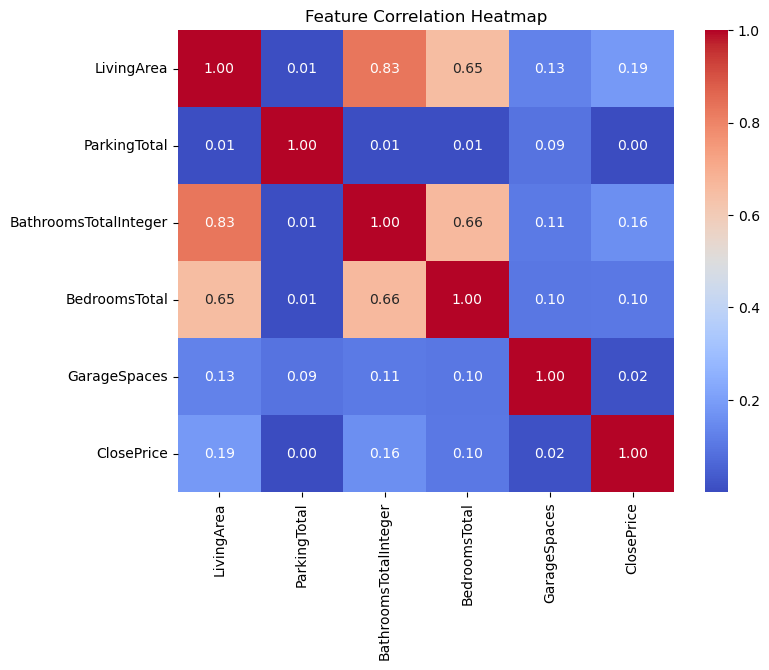

In [18]:


numcols = ['LivingArea','ParkingTotal','BathroomsTotalInteger','BedroomsTotal','GarageSpaces','ClosePrice']
corr = train_df[numcols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


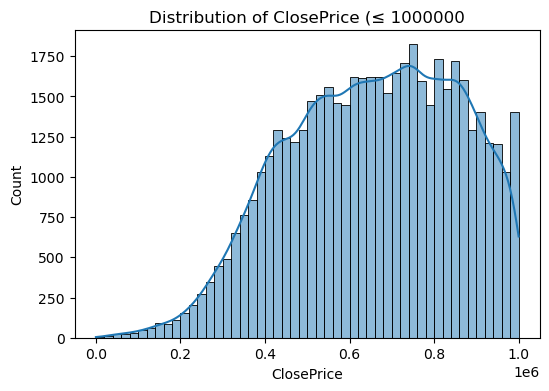

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(
    train_df[train_df['ClosePrice'] <= 1000000]['ClosePrice'],
    bins=50, kde=True
)
plt.title('Distribution of ClosePrice (≤ 1000000')
plt.xlabel('ClosePrice')
plt.ylabel('Count')
plt.show()


That looks correct. The plot now excludes extreme high-end sales and clearly shows the main market range. You can see the typical right skew — most homes cluster between 400k–900k with a long tail toward 1 M. This confirms why a log transform stabilizes variance before regression.


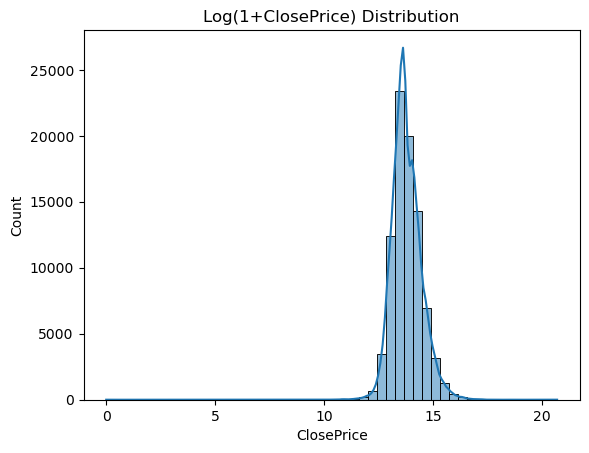

In [20]:
sns.histplot(np.log1p(train_df['ClosePrice']), bins=50, kde=True)
plt.title('Log(1+ClosePrice) Distribution')
plt.show()


Interpretation:

* The **log(1 + ClosePrice)** distribution is now tight and roughly symmetric, close to normal.
* Skewness and extreme tails are gone, so linear regression assumptions (normal residuals, constant variance) are more valid.
* The tall narrow peak near 13–15 ≈ exp(13–15) = ≈ 500 000–3 million USD represents the core housing market range.


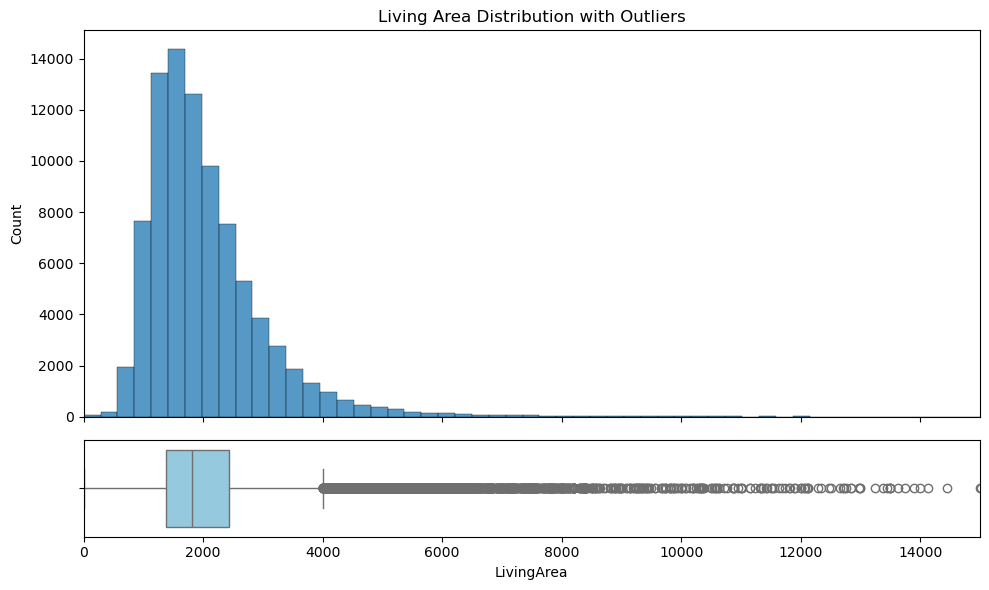

In [21]:
numcols = ['LivingArea','ParkingTotal','BathroomsTotalInteger','BedroomsTotal','GarageSpaces']

fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True,
                       gridspec_kw={'height_ratios':[4,1]})

# Histogram
sns.histplot(train_df['LivingArea'], bins=200, ax=ax[0])
ax[0].set_xlim(0,15000)
ax[0].set_title('Living Area Distribution with Outliers')

# Boxplot
sns.boxplot(x=train_df['LivingArea'], ax=ax[1], color='skyblue')


plt.tight_layout()
plt.show()


Interpretation:

* Histogram (top) shows a **right-skewed** distribution — most homes cluster under 3000 sq ft, with a long sparse tail of very large houses.
* Boxplot (bottom) confirms **many high-end outliers** beyond the upper whisker (≈ 4000 sq ft).
  These are the points that your **quantile or IQR trimming** will remove before modeling.


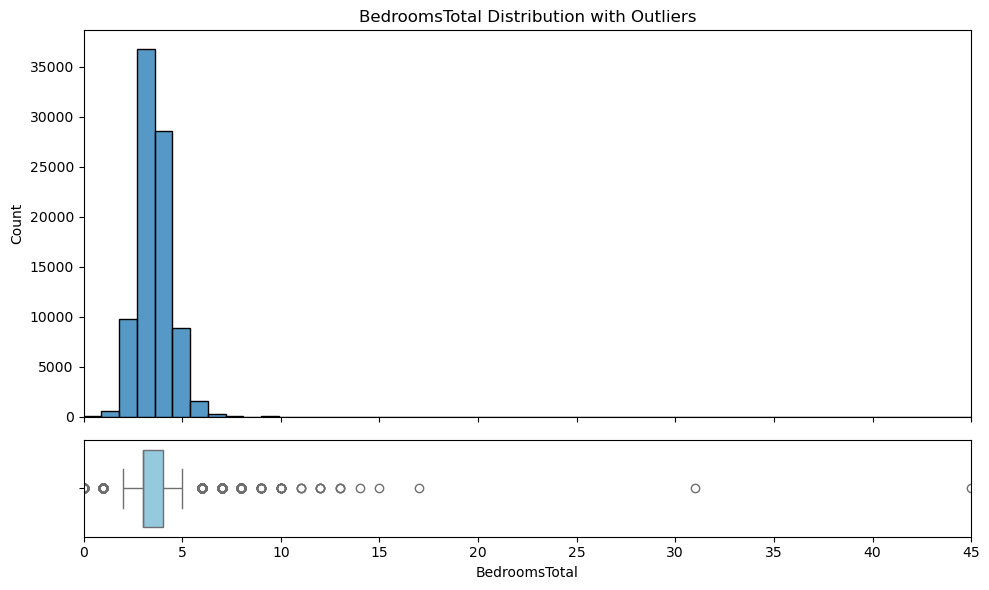

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True,
                       gridspec_kw={'height_ratios':[4,1]})

# Histogram
sns.histplot(train_df['BedroomsTotal'], bins=50, ax=ax[0])
ax[0].set_xlim(0, train_df['BedroomsTotal'].max())
ax[0].set_title('BedroomsTotal Distribution with Outliers')

# Boxplot
sns.boxplot(x=train_df['BedroomsTotal'], ax=ax[1], color='skyblue')
ax[1].set_xlim(0, train_df['BedroomsTotal'].max())

plt.tight_layout()
plt.show()

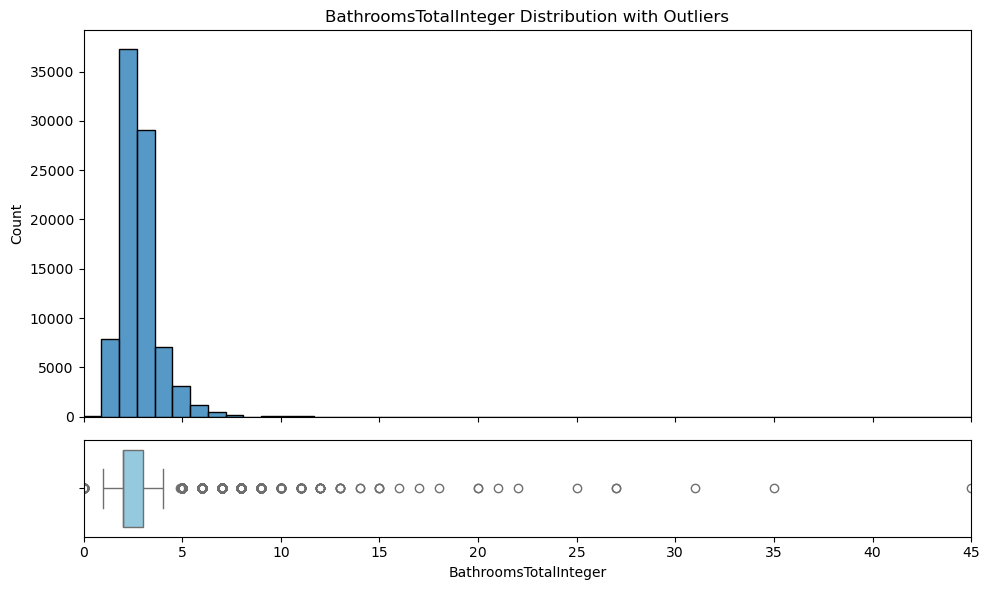

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True,
                       gridspec_kw={'height_ratios':[4,1]})

# Histogram
sns.histplot(train_df['BathroomsTotalInteger'], bins=50, ax=ax[0])
ax[0].set_xlim(0, train_df['BathroomsTotalInteger'].max())
ax[0].set_title('BathroomsTotalInteger Distribution with Outliers')

# Boxplot
sns.boxplot(x=train_df['BathroomsTotalInteger'], ax=ax[1], color='skyblue')
ax[1].set_xlim(0, train_df['BathroomsTotalInteger'].max())

plt.tight_layout()
plt.show()

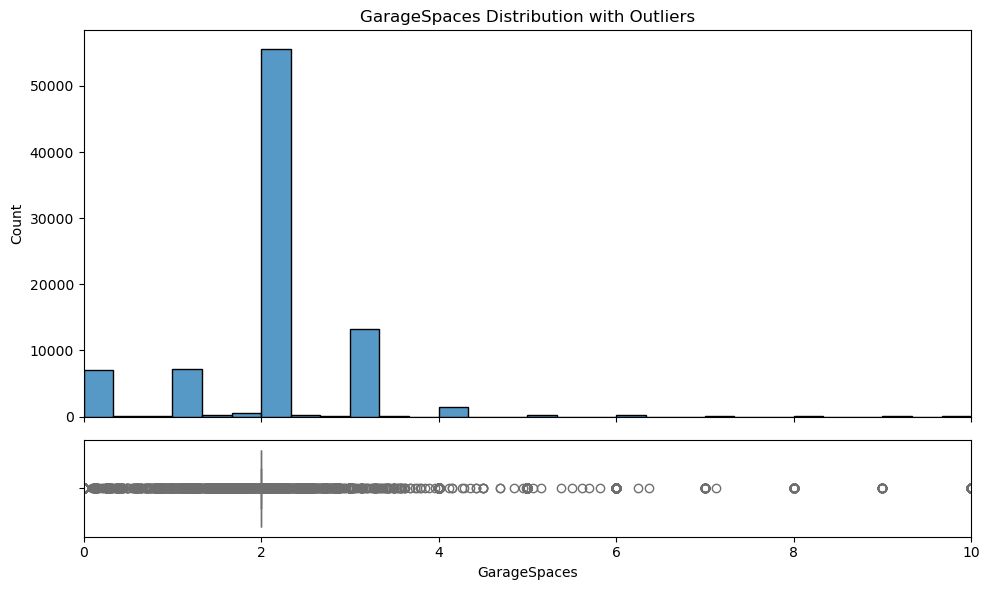

In [24]:
train_df['GarageSpaces'] = train_df['GarageSpaces'].clip(upper=10)

fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True,
                       gridspec_kw={'height_ratios':[4,1]})

sns.histplot(train_df['GarageSpaces'], bins=30, ax=ax[0])
ax[0].set_xlim(0, train_df['GarageSpaces'].max())
ax[0].set_title('GarageSpaces Distribution with Outliers')

sns.boxplot(x=train_df['GarageSpaces'], ax=ax[1], color='skyblue')
ax[1].set_xlim(0, train_df['GarageSpaces'].max())

plt.tight_layout()
plt.show()


That distribution is badly skewed — classic data-entry artifacts.

Interpretation:

* Almost all values sit at **0–3 garage spaces**, yet a handful reach absurd numbers (100–500).
* Those upper values are unrealistic for homes and likely **data errors or multi-unit misclassifications**.


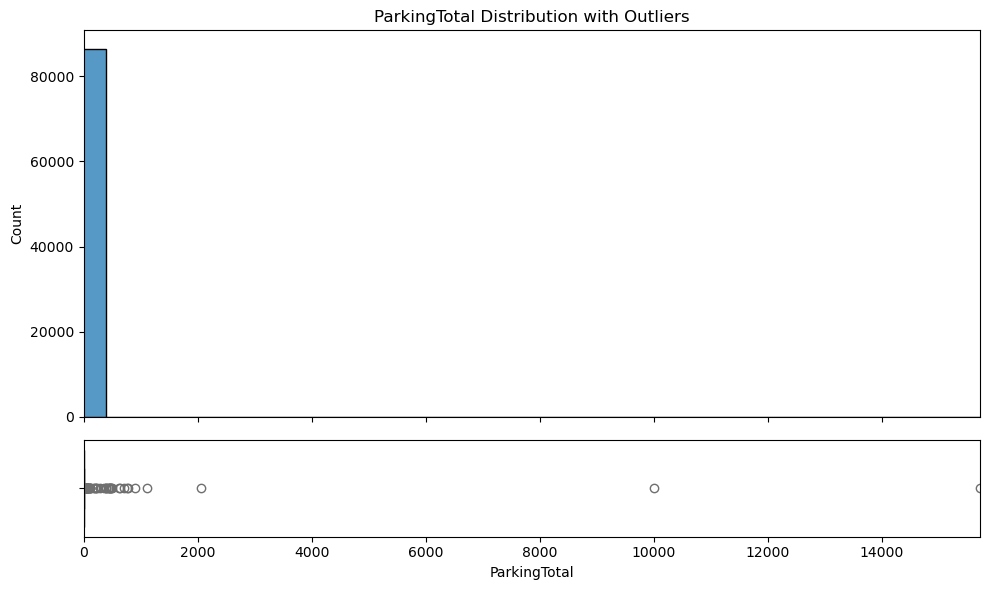

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True,
                       gridspec_kw={'height_ratios':[4,1]})

sns.histplot(train_df['ParkingTotal'], bins=30, ax=ax[0])
ax[0].set_xlim(0, train_df['ParkingTotal'].max())
ax[0].set_title('ParkingTotal Distribution with Outliers')

sns.boxplot(x=train_df['ParkingTotal'], ax=ax[1], color='skyblue')
ax[1].set_xlim(0, train_df['ParkingTotal'].max())

plt.tight_layout()
plt.show()


The ParkingTotal field contains extreme, non-physical outliers (hundreds or thousands of spots). Real houses rarely exceed 10–15.

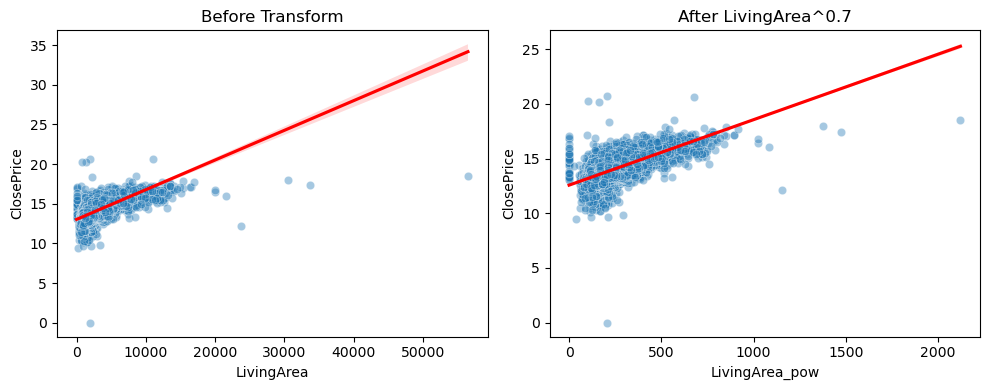

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Raw
sns.scatterplot(
    x='LivingArea', 
    y=np.log1p(train_df['ClosePrice']), 
    data=train_df, 
    alpha=0.4, ax=ax[0]
)
sns.regplot(
    x='LivingArea', 
    y=np.log1p(train_df['ClosePrice']), 
    data=train_df, 
    scatter=False, color='red', ax=ax[0]
)
ax[0].set_title('Before Transform')

# Power transformed
train_df['LivingArea_pow'] = train_df['LivingArea']**0.7
sns.scatterplot(
    x='LivingArea_pow', 
    y=np.log1p(train_df['ClosePrice']), 
    data=train_df, 
    alpha=0.4, ax=ax[1]
)
sns.regplot(
    x='LivingArea_pow', 
    y=np.log1p(train_df['ClosePrice']), 
    data=train_df, 
    scatter=False, color='red', ax=ax[1]
)
ax[1].set_title('After LivingArea^0.7')

plt.tight_layout()
plt.show()


Left panel shows a concave-up curve: price growth slows as area increases, but the raw variable exaggerates big houses. The regression line cuts through, failing to follow the curvature.

Right panel (area^0.7) compresses large values, flattening the curve, now closer to linear. That’s why the power < 1 transform is valid: it models diminishing returns per added square foot, reducing heteroscedasticity and improving linear fit.

In [27]:
def trim_quantile(df, target='ClosePrice', q=0.005):
    lo = df[target].quantile(q)
    hi = df[target].quantile(1 - q)
    return df[(df[target] >= lo) & (df[target] <= hi)].copy()

# Apply
train_t = trim_quantile(train_df, q=0.005)
test_t  = trim_quantile(test_df,  q=0.005)

In [28]:
train_t = train_t[train_t['ClosePrice'].ge(0) & train_t['ClosePrice'].notna()].copy()
test_t  = test_t [test_t ['ClosePrice'].ge(0) & test_t ['ClosePrice'].notna()].copy()

In [29]:

x = np.log1p(train_df['LivingArea'].astype(float))
y = np.log1p(train_df['ClosePrice'].astype(float))
p = sm.OLS(y, sm.add_constant(x)).fit().params[1]   # slope = exponent
print(p)  # use X**p (or keep log model)

0.7682575198120081


/var/folders/v9/47dbywsd3kq7y4_mgpqb1kqm0000gn/T/ipykernel_49446/2874204697.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = sm.OLS(y, sm.add_constant(x)).fit().params[1]   # slope = exponent


In [ ]:

# Build features (same as before)
def make_X(df, cats_ref=None):
    pc = df['PostalCode'].astype(str)
    one_hot_PostalCode = pd.get_dummies(pc, prefix='PostalCode', dtype=int)

    levels = df['Levels'].fillna('').astype(str)
    flooring = df['Flooring'].fillna('').astype(str)
    level_dummies = levels.str.get_dummies(sep=',').astype(int)
    Flooring_dummies = flooring.str.get_dummies(sep=',').astype(int)

    x_num = df[['LivingArea','ParkingTotal','BathroomsTotalInteger','BedroomsTotal','GarageSpaces']].copy()

    X = pd.concat([x_num, Flooring_dummies, level_dummies, one_hot_PostalCode], axis=1)
    X['LivingArea'] = X['LivingArea']**0.7

    # LOG1P target to avoid -inf on zeros
    y = np.log1p(df['ClosePrice'].astype(float))

    if cats_ref is not None:
        X = X.reindex(columns=cats_ref, fill_value=0)
    return X, y

X_train, y_train = make_X(train_t)
train_cols = X_train.columns.tolist()
X_test, y_test = make_X(test_t, cats_ref=train_cols)



# Fit and invert with expm1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

m = LinearRegression()
m.fit(X_train, y_train)
y_pred = np.expm1(m.predict(X_test))

print('R²:', r2_score(test_t['ClosePrice'], y_pred))
print('MAPE:', mean_absolute_percentage_error(test_t['ClosePrice'], y_pred))

R²: 0.7678390310847287
MAPE: 0.14678896383386503


In [32]:
pickle.dump(X_train.columns.tolist(), open("train_cols.pkl","wb"))


In [31]:
import pickle

with open("linreg_model.pkl", "wb") as f:
    pickle.dump(m, f)
